<a href="https://colab.research.google.com/github/MohamedTolba1199/DeepLearning/blob/main/Fashion_Product_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dropout
from warnings import filterwarnings
filterwarnings('ignore')

In [8]:
fash=tf.keras.datasets.fashion_mnist
(X_train ,y_train ),(X_test ,y_test)=fash.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [9]:
X_train.shape ,y_train.shape ,X_test.shape ,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

#split data and scaling

In [10]:
X_val,X_train = X_train[:4000], X_train[4000:]/255
y_val,y_train = y_train[:4000], y_train[4000:]
X_test = X_test/255

In [11]:
set(y_train)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [12]:
y_train[4000]

5

In [13]:
classes_names=['T-shirt/Top' , 'Trouser' ,'pullover' ,'Dress' ,'Coat' ,"Sandal" ,"Shirt" ,"Sneaker" ,"Bag","Ankle boot"]

In [15]:
classes_names[y_train[0]], classes_names[y_train[4000]]

('Bag', 'Sandal')

#let's take a look at a sample of the images in data sets

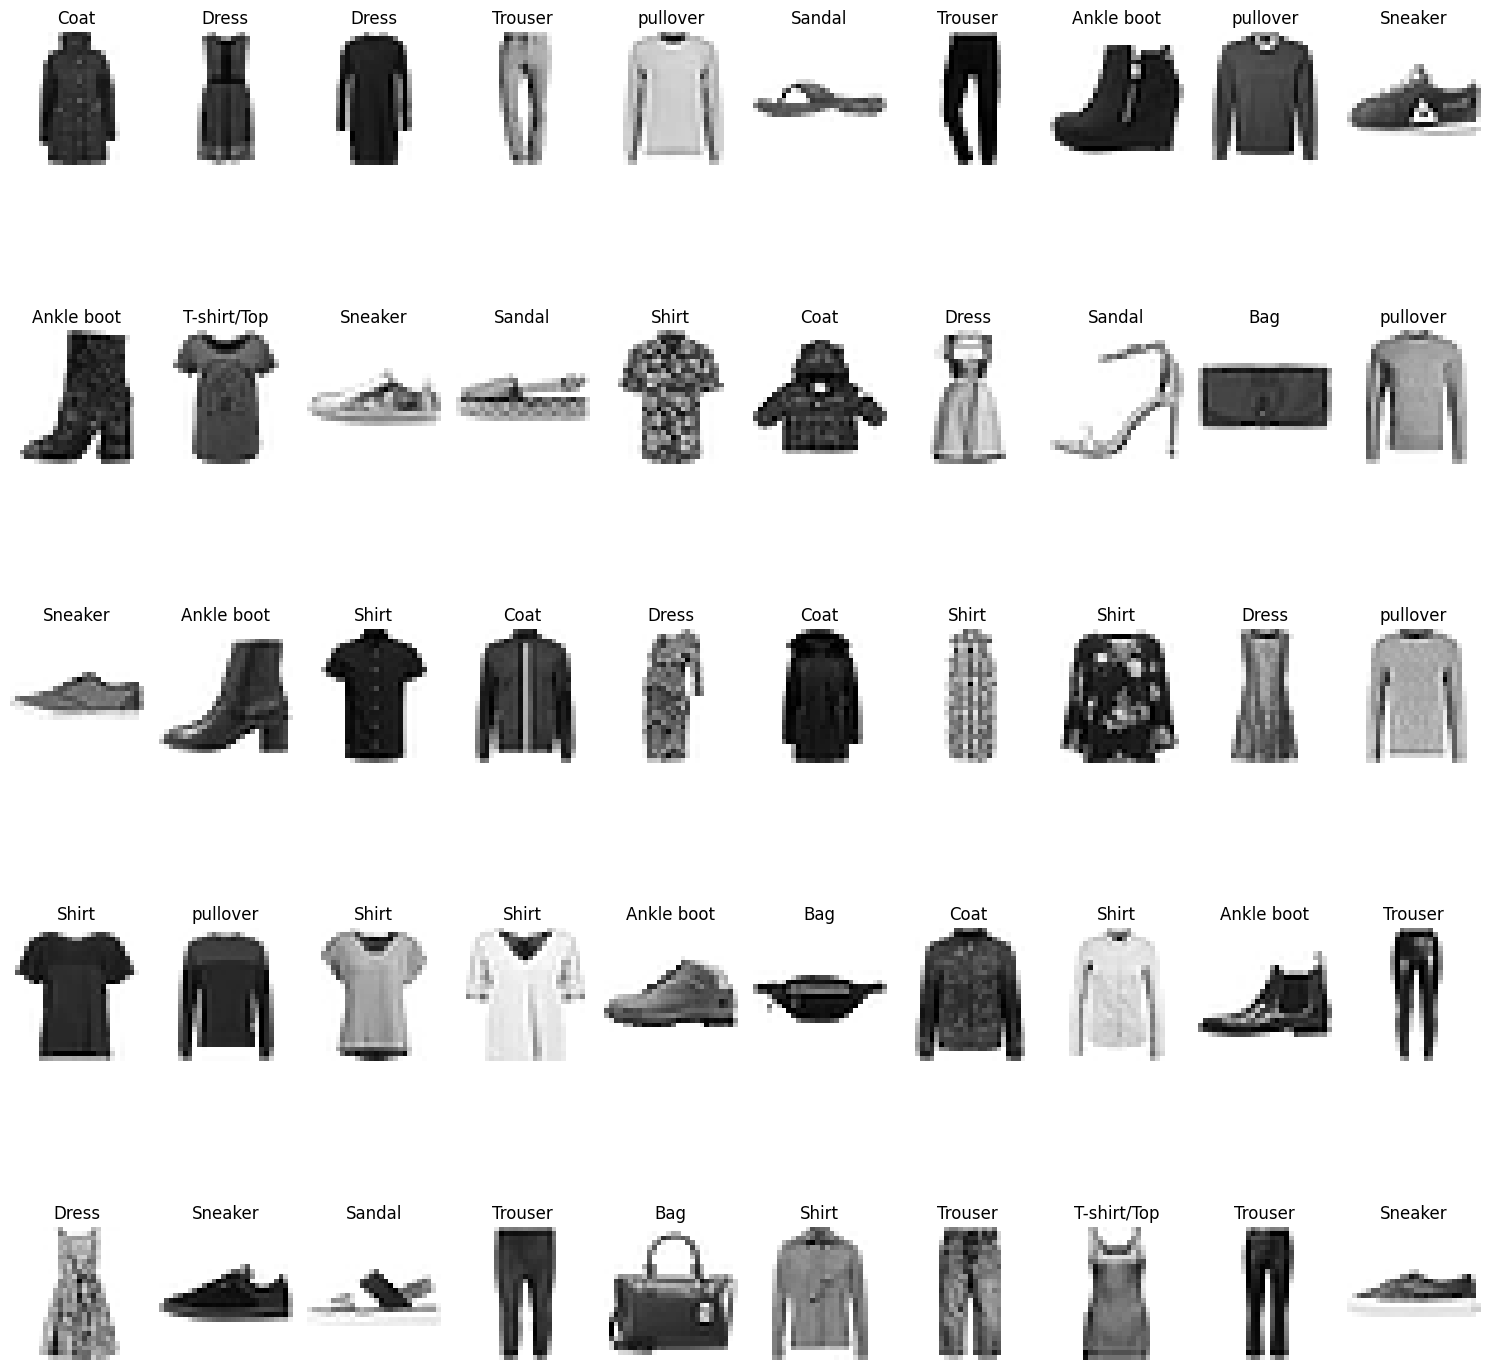

In [19]:
plt.figure(figsize=(15,16))
plotnumber=1
for i in range(1,51):
  if plotnumber <= 50:
    ax=plt.subplot(5,10,plotnumber)
    plt.imshow(X_train[i], cmap='binary')
    plt.axis('off')
    plt.title(classes_names[y_train[i]] , fontdict={'fontsize':12 , 'color':'black'})
    plotnumber+=1
plt.tight_layout()
plt.show()

#Build Model

In [31]:
model=keras.models.Sequential(
    [
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(100,activation='relu'),
    Dropout(0.3), #Dropout --->to solve The Overfitting Problem
    keras.layers.Dense(70,activation='relu'),
    Dropout(0.3),
    keras.layers.Dense(50,activation='relu'),
    Dropout(0.3),
    keras.layers.Dense(10,activation='softmax')


    ]
)

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 70)                7070      
                                                                 
 dropout_1 (Dropout)         (None, 70)                0         
                                                                 
 dense_3 (Dense)             (None, 50)                3550      
                                                                 
 dropout_2 (Dropout)         (None, 50)                0

In [35]:
model.compile(loss='SparseCategoricalCrossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])


In [30]:
history=model.fit( X_train,y_train,validation_data=(X_val,y_val),epochs=10)

Epoch 1/10
1750/1750 [==============================] - 7s 4ms/step - loss: 0.7608 - accuracy: 0.7326 - val_loss: 49.5056 - val_accuracy: 0.8353
Epoch 2/10
1750/1750 [==============================] - 6s 4ms/step - loss: 0.5201 - accuracy: 0.8197 - val_loss: 51.9521 - val_accuracy: 0.8238
Epoch 3/10
1750/1750 [==============================] - 6s 4ms/step - loss: 0.4781 - accuracy: 0.8316 - val_loss: 44.1989 - val_accuracy: 0.8418
Epoch 4/10
1750/1750 [==============================] - 7s 4ms/step - loss: 0.4513 - accuracy: 0.8419 - val_loss: 48.6179 - val_accuracy: 0.8315
Epoch 5/10
1750/1750 [==============================] - 7s 4ms/step - loss: 0.4379 - accuracy: 0.8470 - val_loss: 43.6483 - val_accuracy: 0.8235
Epoch 6/10
1750/1750 [==============================] - 6s 4ms/step - loss: 0.4213 - accuracy: 0.8512 - val_loss: 43.6198 - val_accuracy: 0.8410
Epoch 7/10
1750/1750 [==============================] - 7s 4ms/step - loss: 0.4106 - accuracy: 0.8553 - val_loss: 43.7925 - val_ac

In [36]:
loss,accuracy = model.evaluate(X_test,y_test)
print(f'loss= {loss}')
print(f'accuracy= {accuracy}')

313/313 [==============================] - 1s 2ms/step - loss: 2.3554 - accuracy: 0.0918
loss= 2.3554437160491943
accuracy= 0.09179999679327011


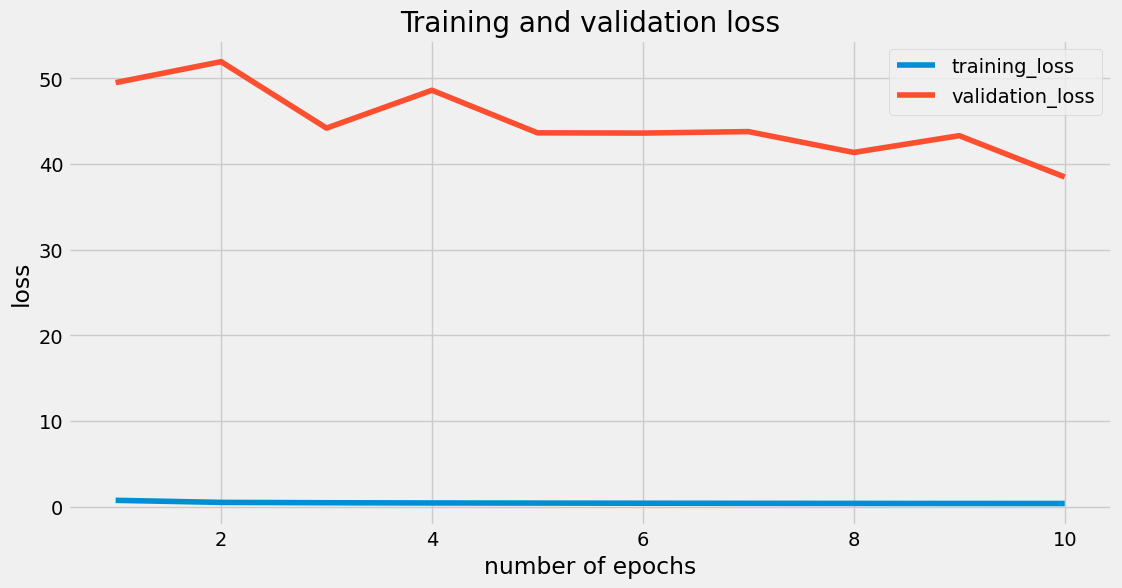

In [39]:
plt.figure(figsize=(12,6))
plt.style.use('fivethirtyeight')

train_loss=history.history['loss']
validation_loss=history.history['val_loss']

epoch=range(1,11)
sns.lineplot(x=epoch   ,y=train_loss ,label='training_loss')
sns.lineplot(x=epoch   ,y=validation_loss ,label='validation_loss')

plt.title('Training and validation loss')
plt.xlabel('number of epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

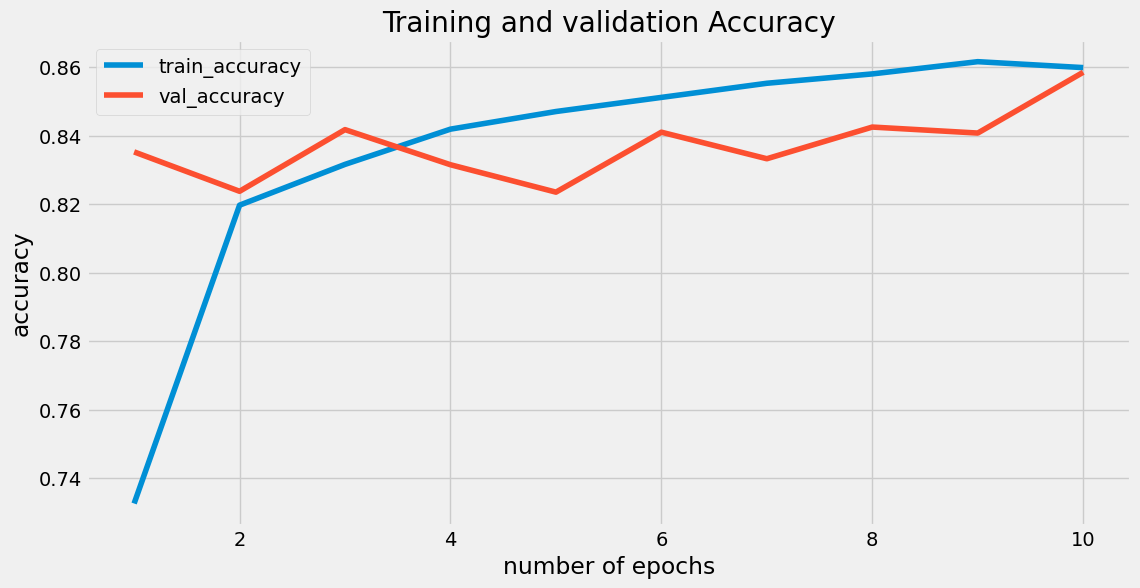

In [40]:
plt.figure(figsize=(12,6))
plt.style.use('fivethirtyeight')

train_accuracy=history.history['accuracy']
val_accuracy=history.history['val_accuracy']

epoch=range(1,11)
sns.lineplot(x=epoch   ,y=train_accuracy ,label='train_accuracy')
sns.lineplot(x=epoch   ,y=val_accuracy ,label='val_accuracy')

plt.title('Training and validation Accuracy')
plt.xlabel('number of epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [41]:
y_probs=model.predict(X_test)
y_pred=y_probs.argmax(axis=1)
y_pred[:100]

313/313 [==============================] - 1s 3ms/step


array([1, 1, 1, 1, 7, 1, 7, 1, 7, 7, 1, 1, 1, 1, 1, 7, 7, 7, 7, 1, 1, 0,
       0, 0, 7, 1, 1, 7, 0, 1, 1, 1, 7, 7, 1, 1, 7, 7, 7, 0, 7, 1, 7, 0,
       1, 0, 1, 7, 1, 1, 1, 1, 7, 1, 1, 1, 1, 1, 7, 7, 7, 0, 1, 1, 7, 7,
       7, 7, 0, 1, 0, 1, 1, 7, 1, 7, 7, 1, 1, 1, 7, 1, 1, 0, 7, 7, 1, 1,
       7, 1, 7, 7, 1, 0, 1, 1, 7, 7, 1, 1])